In [25]:
import pandas as pd
import re
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import pandas as pd
from matplotlib import pyplot as plt
from dateutil import parser
import seaborn as sb

In [32]:
data_frames2013 ={}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2013={}
for i in range(1, 31):
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2013/TV_RAINGAUGEINFO_2013_{i}.csv"
    data_frames2013[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')

gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 31):
        key = f'df_{i}'


        filtered_df = data_frames2013[key][data_frames2013[key]['GU_NAME'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)

for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['RECEIVE_TIME'].dt.date
    df2013[gu_name] = data[gu_name].groupby('DATE')['RAINFALLACCU'].max().diff()

for gu_name in gu_names:
    df2013[gu_name] = df2013[gu_name].apply(lambda x: x if x > 0 else 0)
df2013

{'종로구': DATE
 2013-01-01    0.0
 2013-01-02    0.0
 2013-01-03    0.0
 2013-01-04    0.0
 2013-01-05    0.0
              ... 
 2013-12-27    0.0
 2013-12-28    0.0
 2013-12-29    0.0
 2013-12-30    0.0
 2013-12-31    0.0
 Name: RAINFALLACCU, Length: 354, dtype: float64,
 '중구': DATE
 2013-01-01    0.0
 2013-01-02    0.0
 2013-01-03    0.0
 2013-01-04    0.0
 2013-01-05    0.5
              ... 
 2013-12-27    0.0
 2013-12-28    0.0
 2013-12-29    0.0
 2013-12-30    0.0
 2013-12-31    0.0
 Name: RAINFALLACCU, Length: 363, dtype: float64,
 '용산구': DATE
 2013-01-01    0.0
 2013-01-02    0.0
 2013-01-03    0.0
 2013-01-04    0.0
 2013-01-05    0.5
              ... 
 2013-12-27    0.0
 2013-12-28    0.0
 2013-12-29    0.0
 2013-12-30    0.0
 2013-12-31    0.0
 Name: RAINFALLACCU, Length: 347, dtype: float64,
 '성동구': DATE
 2013-01-05    0.0
 2013-01-06    0.5
 2013-01-07    0.5
 2013-01-08    0.0
 2013-01-09    0.0
              ... 
 2013-12-27    0.0
 2013-12-28    0.0
 2013-12-29    0.0
 

In [33]:
data_frames2014 ={}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2014={}
for i in range(1, 31):
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2014/TV_RAINGAUGEINFO_2014_{i}.csv"
    data_frames2014[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
df_list = [f'df_{i}' for i in range(1, 31)]
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 31):
        key = f'df_{i}'


        filtered_df = data_frames2014[key][data_frames2014[key]['GU_NAME'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)
        
for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['RECEIVE_TIME'].dt.date
    df2014[gu_name] = data[gu_name].groupby('DATE')['RAINFALLACCU'].max().diff()
    
for gu_name in gu_names:
    df2014[gu_name] = df2014[gu_name].apply(lambda x: x if x > 0 else 0)
df2014

{'종로구': DATE
 2014-01-01    0.0
 2014-01-02    0.0
 2014-01-03    0.0
 2014-01-04    0.0
 2014-01-05    0.0
              ... 
 2014-12-27    0.0
 2014-12-28    0.0
 2014-12-29    0.0
 2014-12-30    0.0
 2014-12-31    0.0
 Name: RAINFALLACCU, Length: 310, dtype: float64,
 '중구': DATE
 2014-01-10    0.0
 2014-01-11    0.0
 2014-01-12    0.0
 2014-01-13    0.0
 2014-01-14    0.0
              ... 
 2014-12-27    0.0
 2014-12-28    0.0
 2014-12-29    0.0
 2014-12-30    0.0
 2014-12-31    0.0
 Name: RAINFALLACCU, Length: 319, dtype: float64,
 '용산구': DATE
 2014-01-10    0.0
 2014-01-11    0.0
 2014-01-12    0.0
 2014-01-13    0.0
 2014-01-14    0.0
              ... 
 2014-12-27    0.0
 2014-12-28    0.0
 2014-12-29    0.0
 2014-12-30    0.0
 2014-12-31    0.0
 Name: RAINFALLACCU, Length: 299, dtype: float64,
 '성동구': DATE
 2014-01-10    0.0
 2014-01-11    0.0
 2014-01-12    0.0
 2014-01-13    0.0
 2014-01-14    0.0
              ... 
 2014-12-27    0.0
 2014-12-28    0.0
 2014-12-29    0.0
 

In [35]:
data_frames2015 ={}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2015={}
for i in range(1,24):
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2015/TV_RAINGAUGEINFO_2015_{i}.csv"
    data_frames2015[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
df_list = [f'df_{i}' for i in range(1, 24)]
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 24):
        key = f'df_{i}'


        filtered_df = data_frames2015[key][data_frames2015[key]['GU_NAME'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)
for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['RECEIVE_TIME'].dt.date
    df2015[gu_name] = data[gu_name].groupby('DATE')['RAINFALLACCU'].max().diff()
for gu_name in gu_names:
    df2015[gu_name] = df2015[gu_name].apply(lambda x: x if x > 0 else 0)
df2015

{'종로구': DATE
 2015-01-01      0.0
 2015-01-02    829.0
 2015-01-03      0.0
 2015-01-04      0.0
 2015-01-05      0.5
               ...  
 2015-12-27      0.5
 2015-12-28      0.0
 2015-12-29      0.0
 2015-12-30      2.0
 2015-12-31      0.5
 Name: RAINFALLACCU, Length: 222, dtype: float64,
 '중구': DATE
 2015-01-01    0.0
 2015-01-02    0.0
 2015-01-03    0.0
 2015-01-04    0.0
 2015-01-05    0.0
              ... 
 2015-12-27    0.0
 2015-12-28    0.0
 2015-12-29    0.0
 2015-12-30    2.5
 2015-12-31    0.0
 Name: RAINFALLACCU, Length: 222, dtype: float64,
 '용산구': DATE
 2015-01-01    0.0
 2015-01-02    0.0
 2015-01-03    0.0
 2015-01-04    0.0
 2015-01-05    0.5
              ... 
 2015-12-27    0.0
 2015-12-28    0.0
 2015-12-29    0.0
 2015-12-30    1.0
 2015-12-31    0.0
 Name: RAINFALLACCU, Length: 217, dtype: float64,
 '성동구': DATE
 2015-01-01    0.0
 2015-01-02    0.0
 2015-01-03    0.0
 2015-01-04    0.0
 2015-01-05    0.5
              ... 
 2015-12-27    0.0
 2015-12-28    0.

In [38]:
data_frames2016={}
max_rainfall_per_day ={}
gu_data = {}
data ={}
df2016={}
for i in range(1, 36):
    file_path = f"./서울시_빅데이터_공모전_원본자료/B038. 서울시 강우량정보/2. 파일데이터/2016/TV_RAINGAUGEINFO_2016_{i}.csv"
    data_frames2016[f'df_{i}'] = pd.read_csv(file_path, encoding='euc-kr')
df_list = [f'df_{i}' for i in range(1, 31)]
gu_names = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구",
            "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

for gu_name in gu_names:
    gu_data[gu_name] = []

    for i in range(1, 36):
        key = f'df_{i}'


        filtered_df = data_frames2016[key][data_frames2016[key]['GU_NAME'] == gu_name]
        gu_data[gu_name].append(filtered_df)

for gu_name, dfs in gu_data.items():
    if len(dfs) > 0:
        data[gu_name] = pd.concat(dfs)
for gu_name in gu_names:
    try:
        # Try parsing with a consistent format
        data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format="%Y-%m-%d %H:%M")
    except ValueError:
        try:
            # Try parsing with ISO8601 format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='ISO8601')
        except ValueError:
            # Fallback to mixed format
            data[gu_name]['RECEIVE_TIME'] = pd.to_datetime(data[gu_name]['RECEIVE_TIME'], format='mixed', dayfirst=True)
    data[gu_name]['DATE'] = data[gu_name]['RECEIVE_TIME'].dt.date
    df2016[gu_name] = data[gu_name].groupby('DATE')['RAINFALLACCU'].max().diff()
for gu_name in gu_names:
    df2016[gu_name] = df2016[gu_name].apply(lambda x: x if x > 0 else 0)
df2016

{'종로구': DATE
 2016-01-01    0.0
 2016-01-02    0.0
 2016-01-03    0.0
 2016-01-04    0.0
 2016-01-05    0.0
              ... 
 2016-10-30    0.0
 2016-10-31    0.0
 2016-11-01    0.0
 2016-11-02    0.5
 2016-11-03    0.0
 Name: RAINFALLACCU, Length: 300, dtype: float64,
 '중구': DATE
 2016-01-01    0.0
 2016-01-02    0.0
 2016-01-03    0.0
 2016-01-04    0.0
 2016-01-05    0.0
              ... 
 2016-10-30    0.0
 2016-10-31    0.0
 2016-11-01    0.0
 2016-11-02    0.0
 2016-11-03    0.0
 Name: RAINFALLACCU, Length: 296, dtype: float64,
 '용산구': DATE
 2016-01-01    0.0
 2016-01-02    0.0
 2016-01-03    0.0
 2016-01-04    0.0
 2016-01-05    0.0
              ... 
 2016-10-30    0.0
 2016-10-31    0.0
 2016-11-01    0.0
 2016-11-02    0.0
 2016-11-03    0.0
 Name: RAINFALLACCU, Length: 294, dtype: float64,
 '성동구': DATE
 2016-01-01    0.0
 2016-01-02    0.0
 2016-01-03    0.0
 2016-01-04    0.0
 2016-01-05    0.0
              ... 
 2016-10-30    0.0
 2016-10-31    0.0
 2016-11-01    0.0
 

In [ ]:
df2013

In [68]:
관악구 = pd.concat([df2013['관악구'],df2014['관악구'],df2015['관악구'],df2016['관악구']])
df = pd.DataFrame(관악구)

In [69]:
df = df.reset_index(drop=False)


In [81]:
df

ds    2016-11-03
y         1120.5
dtype: object

In [75]:
df.rename(columns={"DATE": "ds", "RAINFALLACCU": "y"}, inplace=True)

In [76]:
df

,ds,y
0,2013-01-16,0.0
1,2013-01-17,0.0
2,2013-01-18,0.0
3,2013-01-19,0.0
4,2013-01-20,0.0
...,...,...
1080,2016-10-30,0.0
1081,2016-10-31,0.0
1082,2016-11-01,0.0
1083,2016-11-02,0.5


In [82]:
max_value = df['y'].max()
df = df[df['y'] < max_value]


In [85]:
max_value = df['y'].max()
df = df[df['y'] < max_value]


17:34:19 - cmdstanpy - INFO - Chain [1] start processing
17:34:19 - cmdstanpy - INFO - Chain [1] done processing


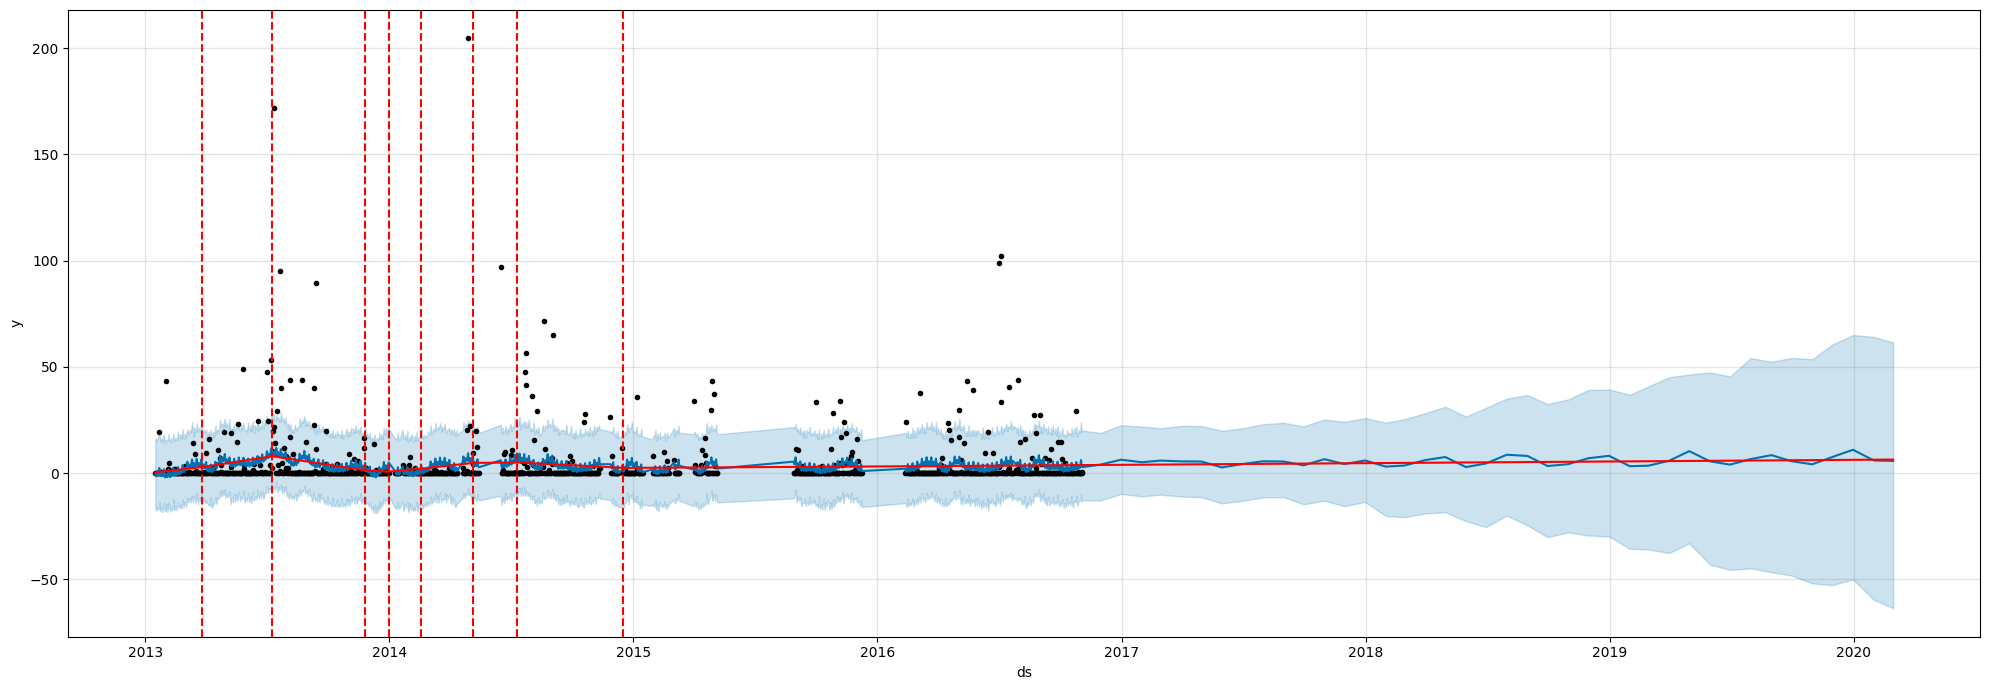

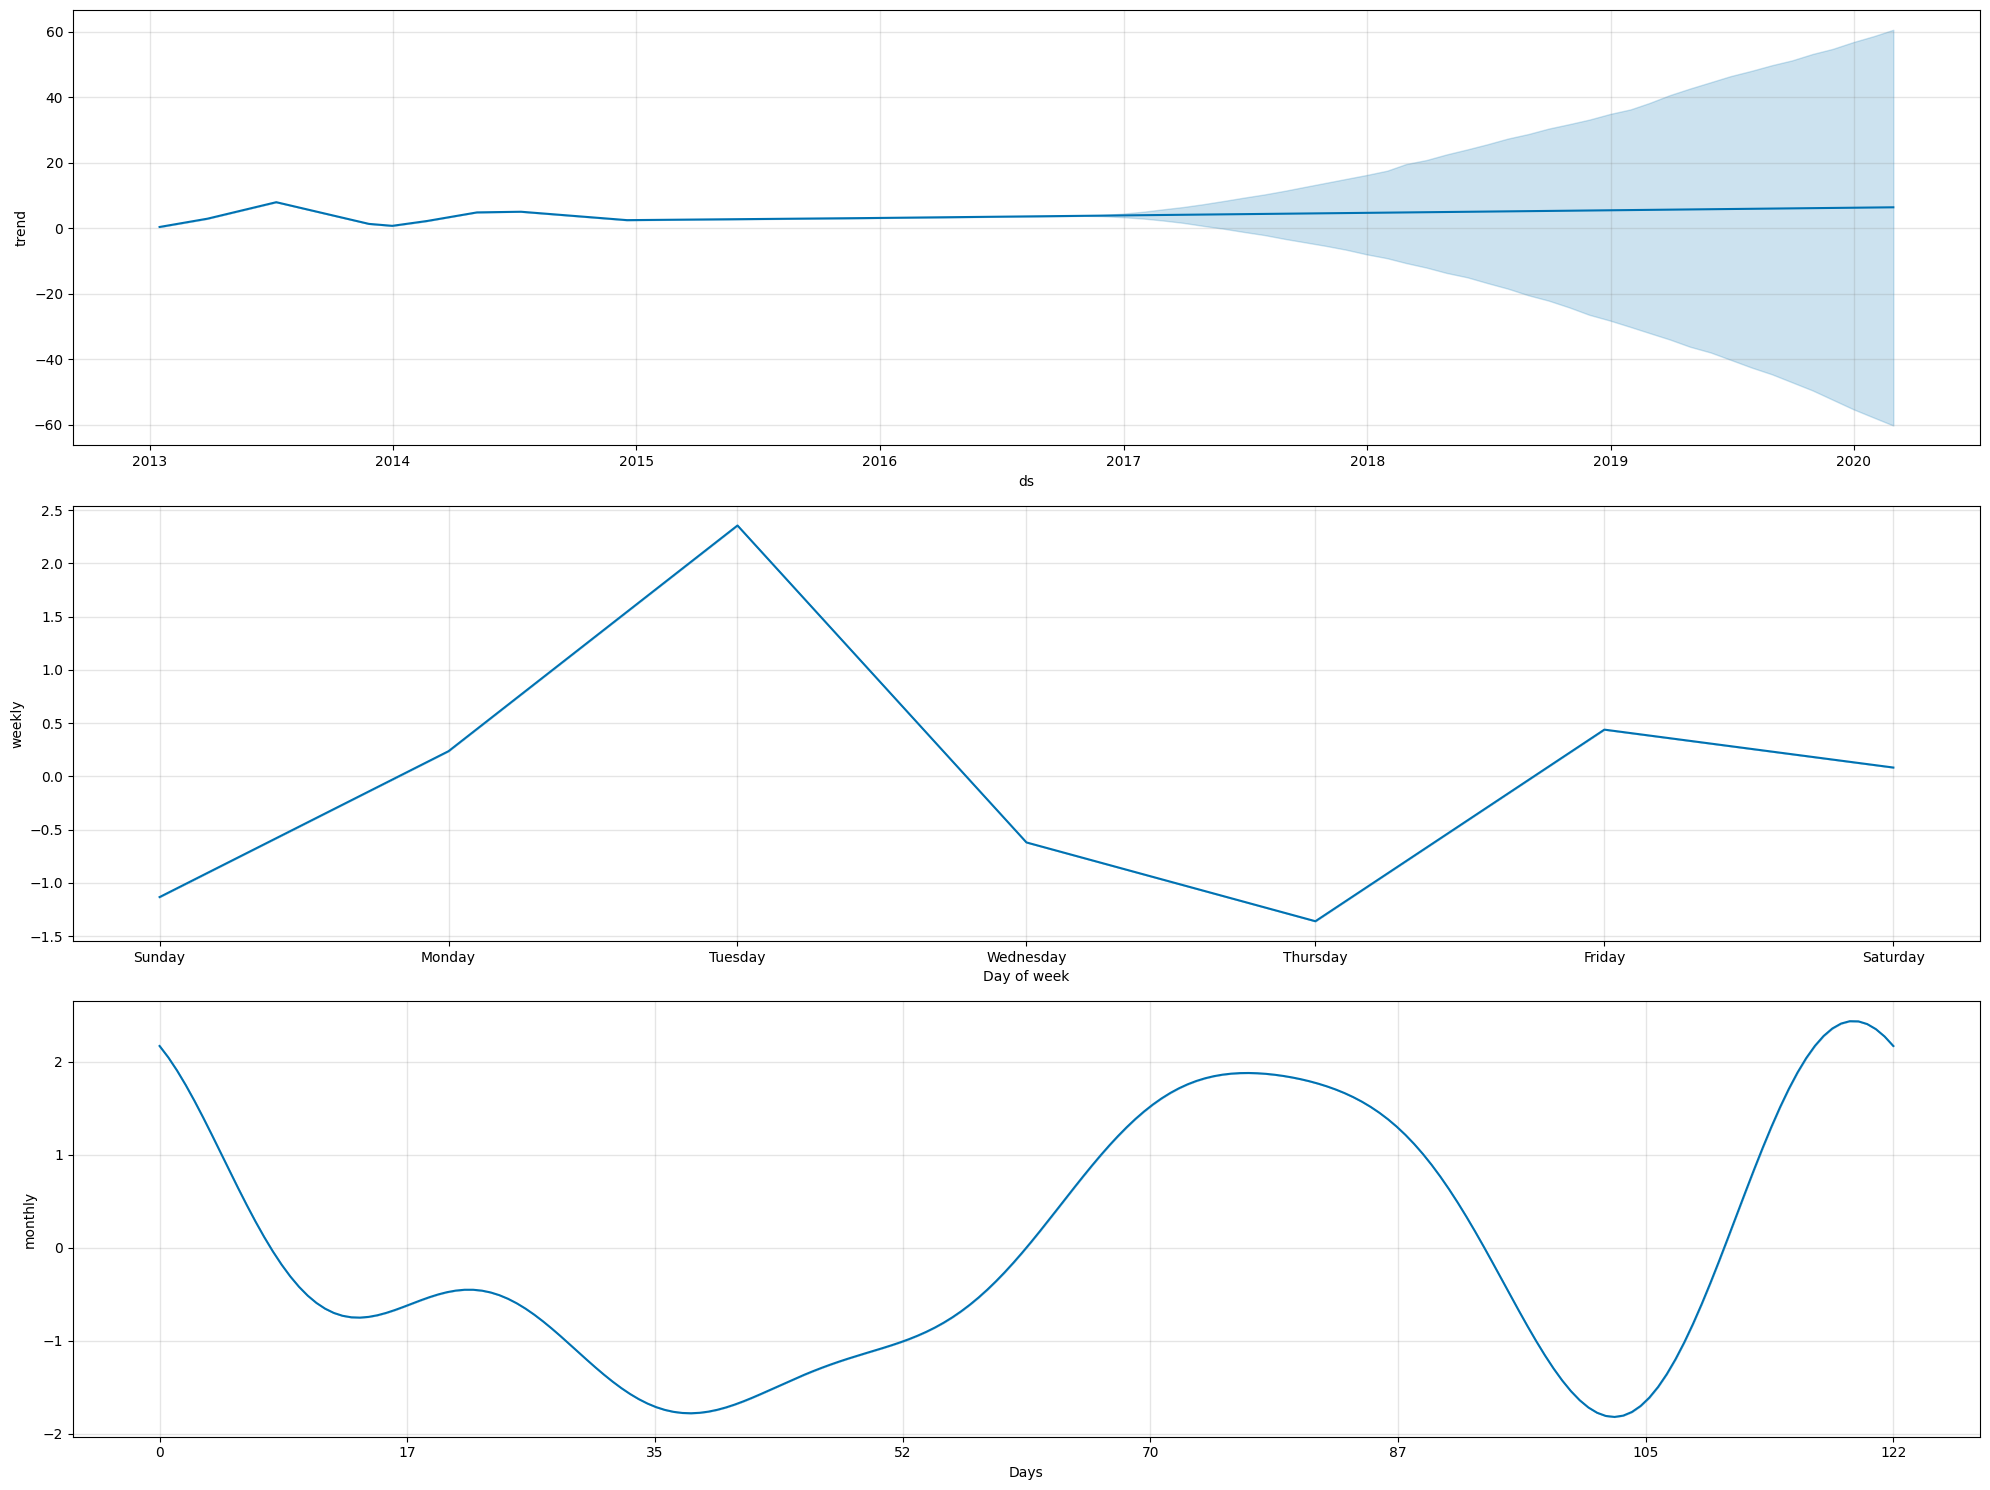

In [87]:
m = Prophet(
    # Trend
    changepoint_prior_scale=0.3,
    # Seasonality
    weekly_seasonality=True,
    yearly_seasonality=False,
    daily_seasonality=False
)

# 월단위 계절성 추가
m.add_seasonality(name='monthly', period=30.5*4, fourier_order=5)

m.fit(df)

# 예측
future = m.make_future_dataframe(periods=40, freq='M')
forecast = m.predict(future)

# 시각화
fig1 = m.plot(forecast, figsize=(20, 7))
add_changepoints_to_plot(fig1.gca(), m, forecast)

fig2 = m.plot_components(forecast, figsize=(20, 15))